# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 1. It implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\livin\AppData\Local\Temp\ipykernel_7372\1918290556.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:\Users\livin\AppData\Local\Temp\ipykernel_7372\3134600209.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


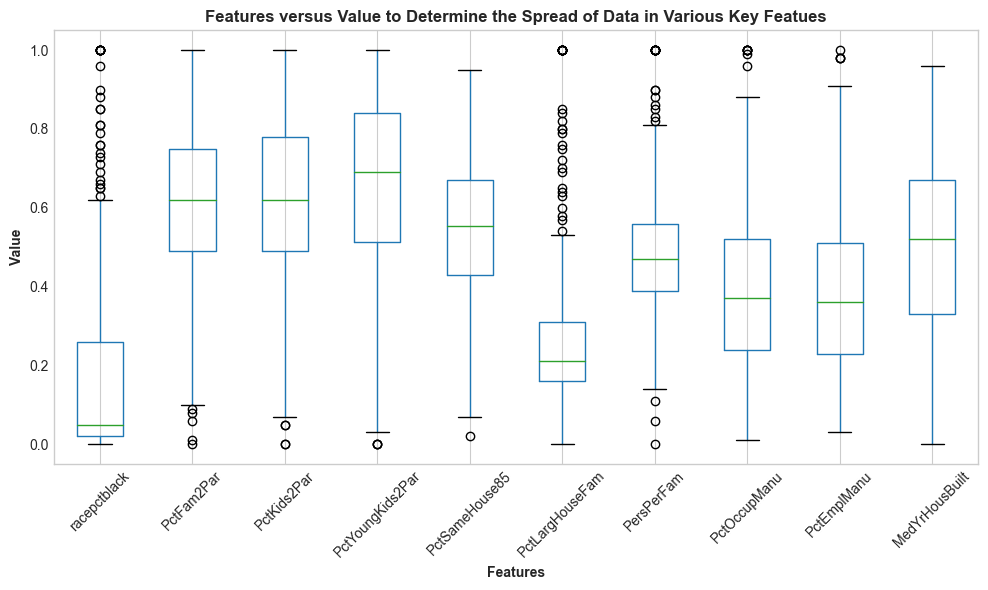

In [3]:
# load data
train = pd.read_csv('Data/Q1/communities_train.csv')
val = pd.read_csv('Data/Q1/communities_val.csv')
test = pd.read_csv('Data/Q1/communities_test.csv')

# Pull out X and y components of the data
# if you want to convert this data to numpy format, you can add .to_numpy() to the end of each row below
X_train = train.iloc[:,0:-1].to_numpy()
y_train = train.iloc[:,-1].to_numpy()
X_val = val.iloc[:,0:-1].to_numpy()
y_val = val.iloc[:,-1].to_numpy()
X_test = test.iloc[:,0:-1].to_numpy()
y_test = test.iloc[:,-1].to_numpy()

# X_train = sm.add_constant(X_train)
# X_val = sm.add_constant(X_val)
# X_test = sm.add_constant(X_test)



# Assuming 'data' is your DataFrame containing the dataset
# Create a DataFrame with the top ten variables and their coefficient of variation (CV)

data = pd.read_csv('Data/Q1/communities_train.csv')

data.columns = data.columns.str.strip()
top_dispersion_vars = pd.DataFrame({
    'Variable': ['racepctblack', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctSameHouse85',
                 'PctLargHouseFam', 'PersPerFam', 'PctOccupManu', 'PctEmplManu', 'MedYrHousBuilt'],
    'CV': [1.39, 0.33, 0.34, 0.33, 0.33, 0.37, 0.31, 0.51, 0.50, 0.47]
})

# Filter your original DataFrame to include only the top dispersion variables
selected_vars = top_dispersion_vars['Variable'].tolist()
df_selected = data[selected_vars]

# Set the style to 'whitegrid' to remove the gray lines
plt.style.use('seaborn-whitegrid')
# Plot the boxplot for the selected variables
plt.figure(figsize=(10, 6))
df_selected.boxplot()
plt.title('Features versus Value to Determine the Spread of Data in Various Key Featues', fontweight='bold')
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
# Turn off the horizontal grid lines for the y-axis
plt.grid(axis='y', linestyle='')

plt.show()




In [4]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing. ADD Constant term to x-train etc if not standardising data. Standardise here. Will standardise cause different units

def standardise(data):

  mu = np.mean(data, axis=0)
  sigma = np.std(data, axis=0)
  scaled = (data - mu) / sigma
  return scaled, mu, sigma

X_train_std, mu_train_x, sigma_train_x = standardise(X_train)
y_train_std, mu_train_y, sigma_train_y = standardise(y_train)
X_val_std = (X_val - mu_train_x)/sigma_train_x
y_val_std = (y_val - mu_train_y)/sigma_train_y
X_test_std = (X_test - mu_train_x)/sigma_train_x
y_test_std = (y_test - mu_train_y)/sigma_train_y



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              6.239
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                    4.63e-28
Time:                        17:07:41   Log-Likelihood:                         -210.77
No. Observations:                 298   AIC:                                      621.5
Df Residuals:                     198   BIC:                                      991.2
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

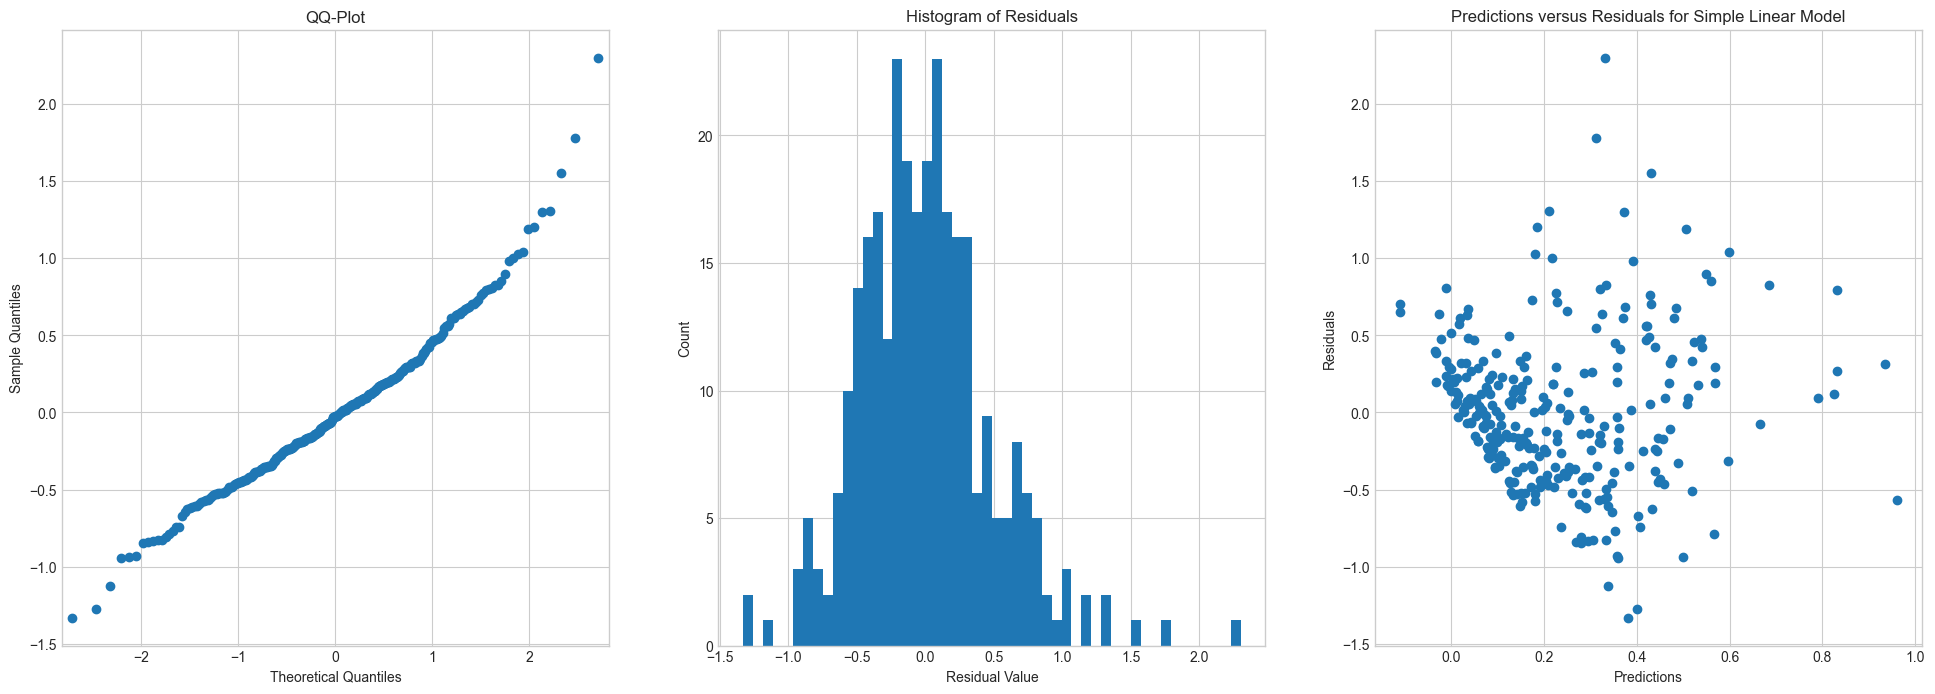

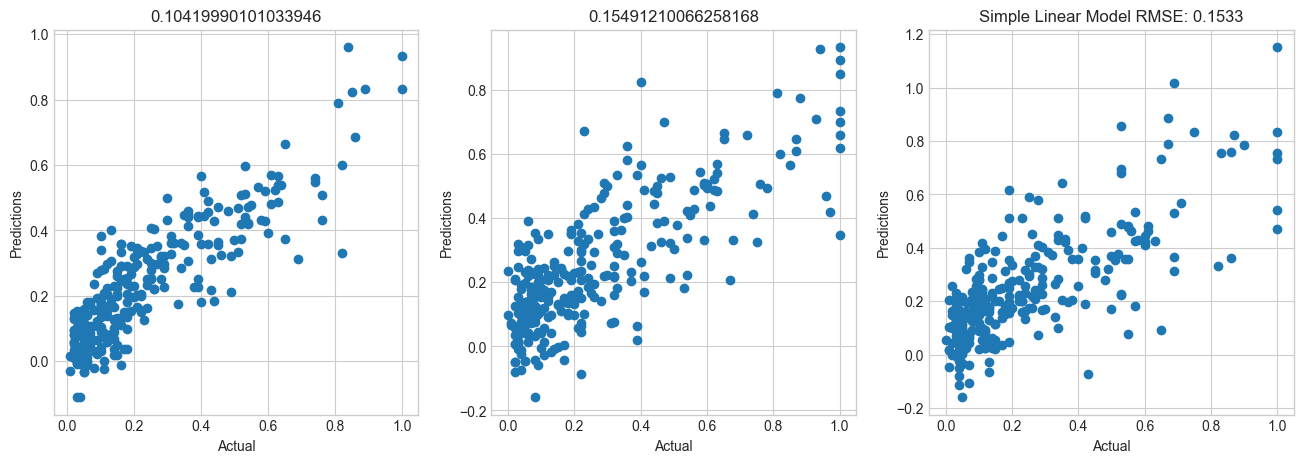

In [14]:
# train your Linear Regression model here. Data has already been split into predictors (X_train, X_val and X_test) and the
# desired response (y_train, y_val and y_test above).
#
# Note that you DO NOT NEED to remove any variables, or add higher order terms. JUST USE THE DATA AS IS.

# Once you've trained the model, evaluate it. This would include:
#  - Measuring the accuracy of the model (i.e. RMSE or similar measures)
#  - Looking at the properties of the fitted model, for example the R^2, and if all terms are contributing to the model
#  - Considering the validity of the trained model. This could include assumptions about independent predictors, and the 
#    distribution of the residuals
# Your write-up should include your findings regarding the above.

model = sm.OLS(y_train_std, X_train_std).fit()
print(model.summary())


def plot_diagnoistics(resids, title, trained_model, resid, X_train, Y_train, X_val, Y_val, X_test, Y_test, Y_mu = 0, Y_sigma = 1):

    # undo standardisation, multiply by sigma, add mu
    Y_train_pred = trained_model.predict(X_train)*Y_sigma + Y_mu
    Y_val_pred = trained_model.predict(X_val)*Y_sigma + Y_mu
    Y_test_pred = trained_model.predict(X_test)*Y_sigma + Y_mu
    
    # undo standardisation for testing data
    Y_train_scaled = Y_train*Y_sigma + Y_mu
    Y_val_scaled = Y_val*Y_sigma + Y_mu
    Y_test_scaled = Y_test*Y_sigma + Y_mu

    fig = plt.figure(figsize=[24, 8])
    ax = fig.add_subplot(1, 3, 1)
    f = sm.qqplot(resid, ax=ax)
    ax.set_title('QQ-Plot')    
    
    ax = fig.add_subplot(1, 3, 2)
    ax.hist(resid, 50)
    ax.set_xlabel('Residual Value')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Residuals')    

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(Y_train_pred, resid)
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Residuals')
    ax.set_title(resids)
    
    rmse_train = np.sqrt(np.mean((Y_train_pred - Y_train_scaled)**2))
    rmse_val = np.sqrt(np.mean((Y_val_pred - Y_val_scaled)**2))
    rmse_test = np.sqrt(np.mean((Y_test_pred - Y_test_scaled)**2))

    fig = plt.figure(figsize=[16, 5])
    ax = fig.add_subplot(1, 3, 1)
    ax.scatter(Y_train_scaled, Y_train_pred)
    v = int(np.min([np.max(Y_train_scaled), np.max(Y_train_pred)]))
    ax.plot(np.arange(0, v))
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title(rmse_train)

    ax = fig.add_subplot(1, 3, 2)
    ax.scatter(Y_val_scaled, Y_val_pred)
    v = int(np.min([np.max(Y_val_scaled), np.max(Y_val_pred)]))
    ax.plot(np.arange(0, v))
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title(rmse_val)

    ax = fig.add_subplot(1, 3, 3)
    ax.scatter(Y_test_scaled, Y_test_pred)
    v = int(np.min([np.max(Y_test_scaled), np.max(Y_test_pred)]))
    ax.plot(np.arange(0, v))
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predictions')
    ax.set_title('{} {:.4f}'.format(title, round(rmse_test, 4)))
    
model_linear_simple = sm.OLS(y_train_std, X_train_std).fit()
print(model_linear_simple.summary())
plot_diagnoistics('Predictions versus Residuals for Simple Linear Model','Simple Linear Model RMSE:', model_linear_simple, model_linear_simple.resid, X_train_std, y_train_std, X_val_std, y_val_std, \
                  X_test_std, y_test_std, mu_train_y, sigma_train_y)



Ridge best lambda 0.06345548031926865
Ridge R2 = 0.7176372790343671
Lasso best lambda 0.0021544346900318843
LASSO R2 0.710780889219102


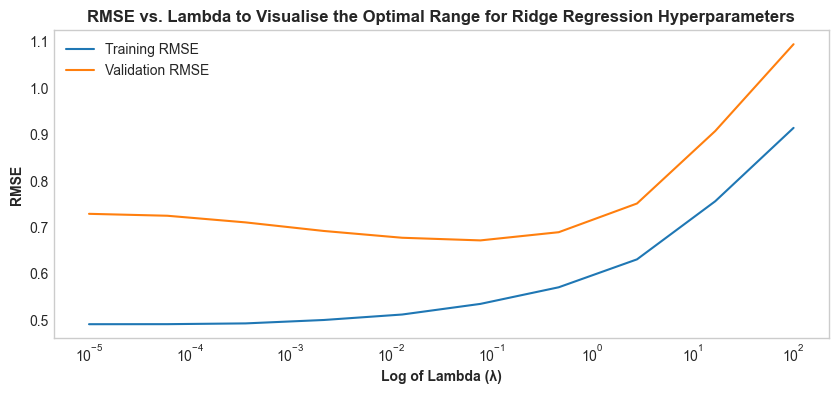

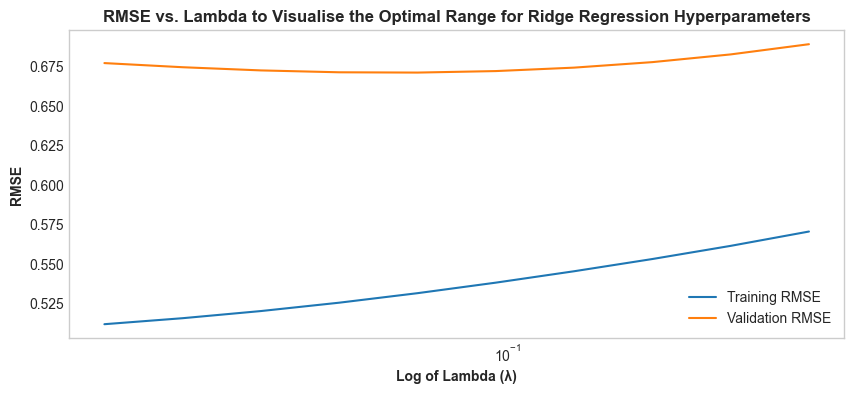

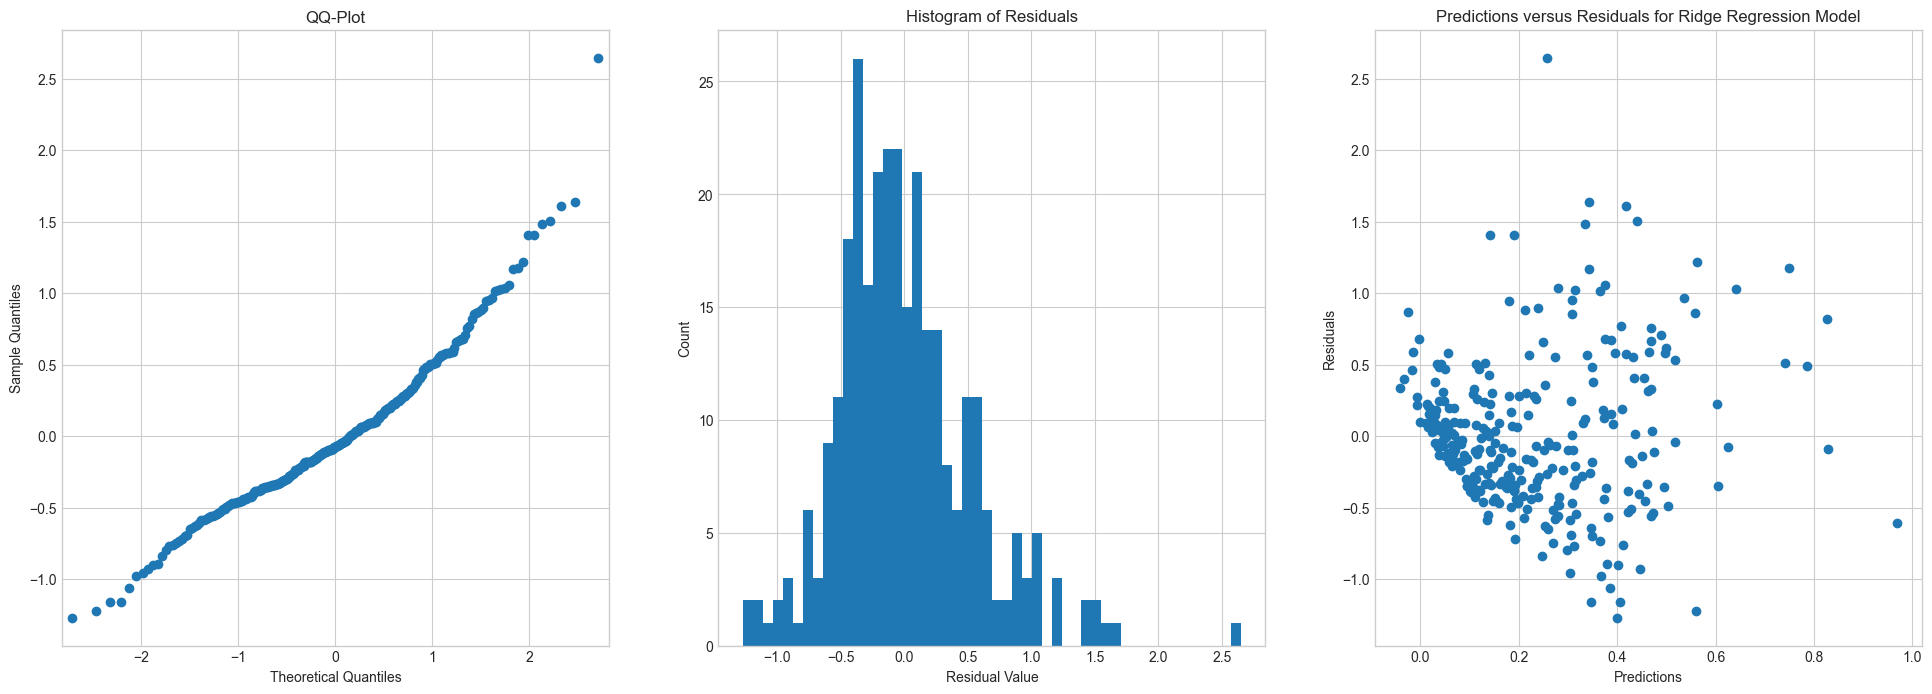

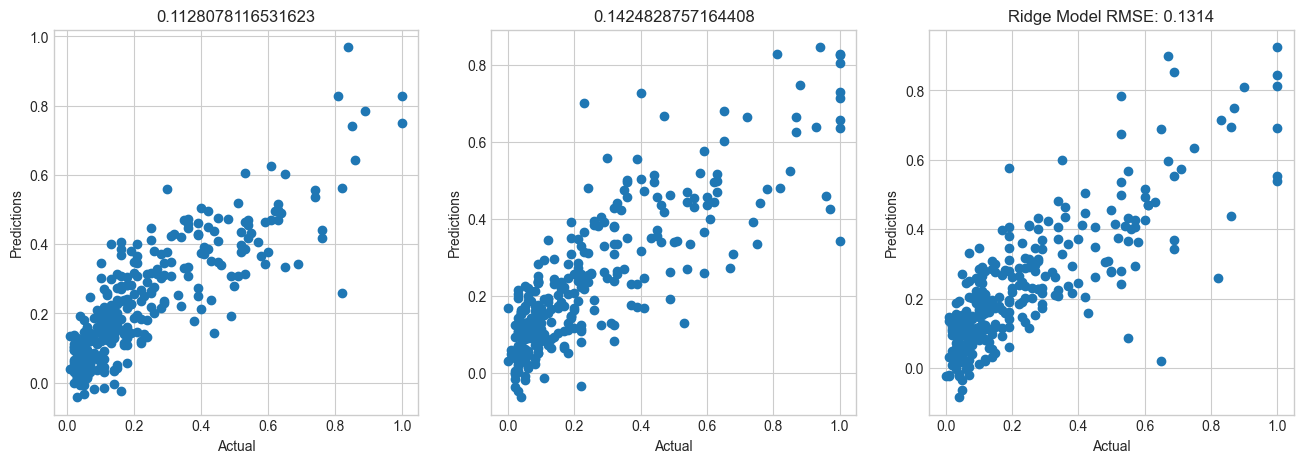

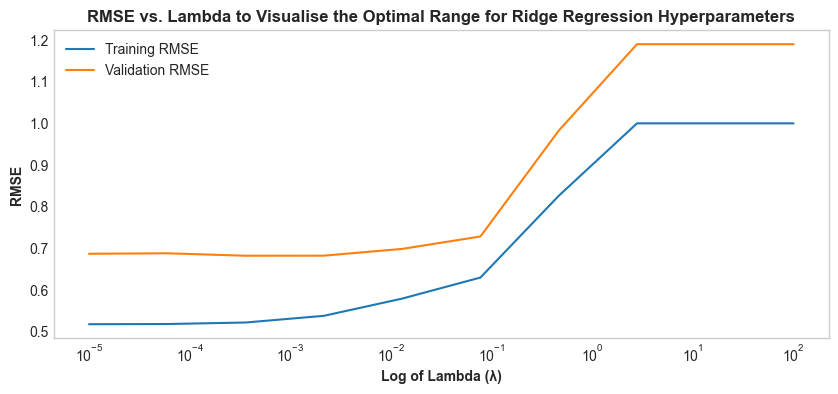

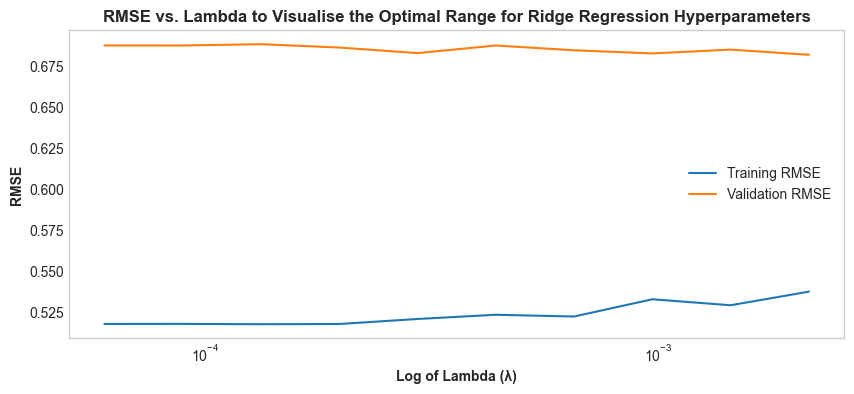

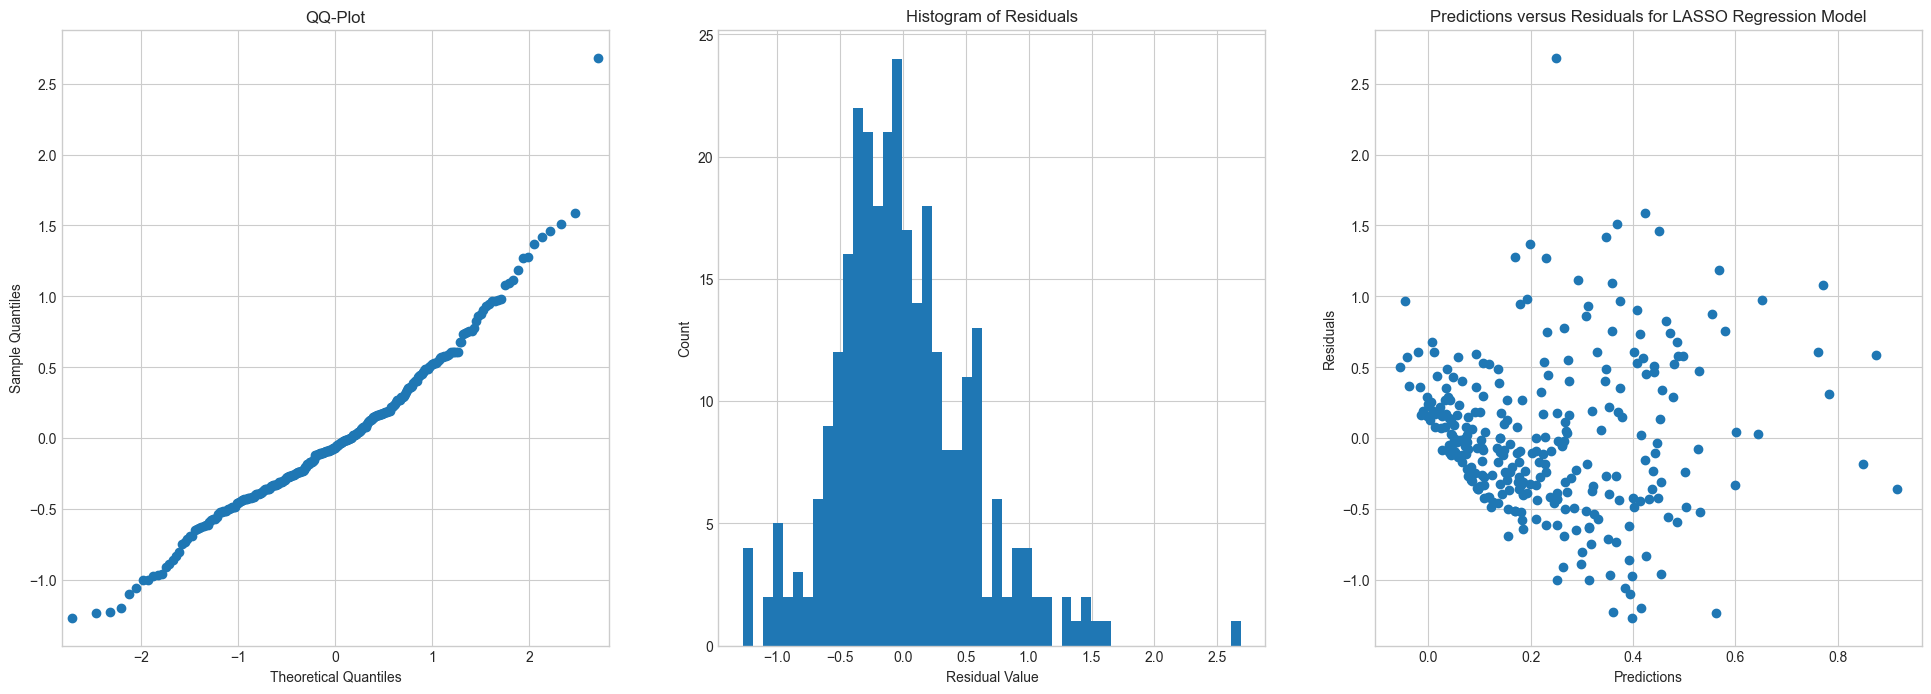

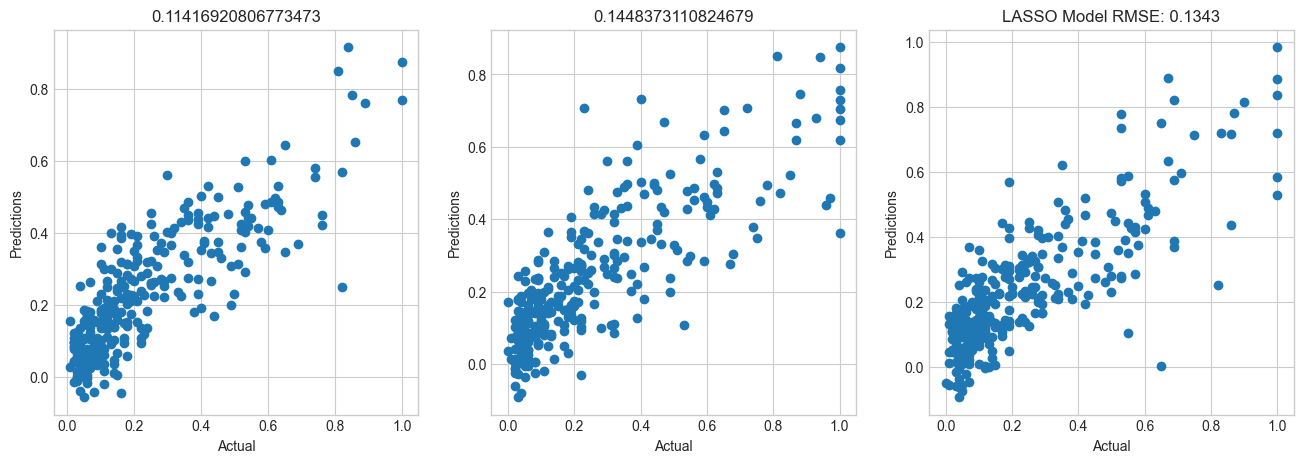

In [15]:
#L1=ridge  L2=LASSO

# train your regularised models (ridge and lasso). Here you will use the same data as you used in for the above regression model
#
# One key consideration with your regularised models is the selection of lambda (i.e. the strength of the regularisation). A suggested 
# starting point for finding your value of lambda is suggested below using numpy.logspace (see 
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). The code below will give you 50 values starting at 10-10 and 
# finishing at 1, spread on a log scale. Just note that for plotting things that result from this, you may want to change the scale of 
# your x-axis to a log scale (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html)
#
# Note that the below list of lambda is going to be fairly coarse. For the sake of speed, we suggest that you avoid evaluating a huge
# number of lambdas in one pass, but you can get a more precise estimate by refining your estimate over multiple passes (i.e. if your
# initial estimate if 0.1, you could run the search again now looking over a range of [0.01 .. 1.0] or similar).
#
# remember that lambda is a keyword in python, so we're calling the array below alphas
#
alphas = np.logspace(-5, 2, 10)

# Once you've found your ridge and lasso models, evaluate them, following the approach you've used for the linear method, and compare the
# three models.
def plot_rmses(lambdas, rmse_train, rmse_validation, log_scale = True):
    fig = plt.figure(figsize=[10, 4])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(lambdas, rmse_train, label='Training RMSE')
    ax.plot(lambdas, rmse_validation, label='Validation RMSE')
    plt.title('RMSE vs. Lambda to Visualise the Optimal Range for Ridge Regression Hyperparameters', fontweight='bold')
    plt.xlabel('Log of Lambda (λ)', fontweight='bold')
    plt.ylabel('RMSE', fontweight='bold')
    plt.grid(linestyle='')
    if log_scale:
        ax.set_xscale('log')
    ax.legend()
    
#compute R2
def r_squared(actual, predicted):
  r2 = r2_score(actual, predicted)
  return r2

#Calculate approximate optimal lambda
def find_lambda(lambdas, X_train, y_train, X_val, y_val, ridge, plot_stuff = True):
    rmse_train = []
    rmse_validation = []
    coeffs = []
    
    if (ridge):
        L1_wt = 0.0
    else:
        L1_wt = 1.0
    
    for l in lambdas:
        model = sm.OLS(y_train, X_train).fit_regularized(alpha=l, L1_wt=L1_wt)        
        coeffs.append(model.params)
        rmse_train.append(np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
        rmse_validation.append(np.sqrt(np.mean((model.predict(X_val) - y_val)**2)))
    if (plot_stuff):
        plot_rmses(lambdas, rmse_train, rmse_validation, True)
    
    best_lambda_index = np.argmin(rmse_validation)
    return lambdas[best_lambda_index], best_lambda_index
 
 #Find optimal Ridge lambda 
best_lambda, best_lambda_index = find_lambda(alphas, X_train_std, y_train_std, X_val_std, y_val_std, True)

min_lambda = np.log10(alphas[best_lambda_index - 1])
mmax_lambda = np.log10(alphas[best_lambda_index + 1])
new_lambdas = np.logspace(min_lambda, mmax_lambda, 10)

best_lambda, best_lambda_index = find_lambda(new_lambdas, X_train_std, y_train_std, X_val_std, y_val_std, True)
print('Ridge best lambda', best_lambda)

#Instantiate Ridge model with best lambda
ridge_model = sm.OLS(y_train_std, X_train_std).fit_regularized(alpha=best_lambda, L1_wt=0.0)
print('Ridge R2 =', r_squared(y_train_std, ridge_model.predict(X_train_std)))

plot_diagnoistics('Predictions versus Residuals for Ridge Regression Model','Ridge Model RMSE:', ridge_model, y_train_std - ridge_model.predict(X_train_std), \
                  X_train_std, y_train_std, X_val_std, y_val_std, X_test_std, y_test_std, mu_train_y, sigma_train_y)

### repeat for lasso model ###
lambdas = np.logspace(-5, 2, 10)

best_lambda, best_lambda_index = find_lambda(lambdas, X_train_std, y_train_std, X_val_std, y_val_std, False)

min_lambda = np.log10(lambdas[best_lambda_index - 1])
mmax_lambda = np.log10(lambdas[best_lambda_index + 1])
new_lambdas = np.logspace(min_lambda, mmax_lambda, 10)

best_lambda, best_lambda_index = find_lambda(new_lambdas, X_train_std, y_train_std, X_val_std, y_val_std, False)
print('Lasso best lambda',best_lambda)

lasso_model = sm.OLS(y_train_std, X_train_std).fit_regularized(alpha=best_lambda, L1_wt=1.0)

plot_diagnoistics('Predictions versus Residuals for LASSO Regression Model','LASSO Model RMSE:', lasso_model, y_train_std - lasso_model.predict(X_train_std), \
                  X_train_std, y_train_std, X_val_std, y_val_std, X_test_std, y_test_std, mu_train_y, sigma_train_y,)
print('LASSO R2', r_squared(y_train_std, lasso_model.predict(X_train_std)))


  


In [7]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the values of lambda used in your regularised models, and what those values are
# - a comparison of three models, considering both the accuracy and validity of the models, as outlined above, this means:
#   > accuracy of the model
#   > measures of fit, such as R^2
#   > testing assumptions about the independence of predictors, and the distribution of the residuals
# - A discussion of the ethical concerns that need to be considered when evaluating the models developed for this problem
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT

#Size of dataset will impact regularisation improvement. lardger dataset, less improvement?
